In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv(r'C:\Users\mouad\car-price-predictor\data\raw\car_details.csv') 

In [3]:
df.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Kilométrage,Nombre de portes,Première main,État,Boîte à vitesses,Origine,Prix
0,Renault,Clio,2022,Essence,8 CV,35 000 - 39 999,5.0,Non,Très bon,Automatique,WW au Maroc,168 000 DH
1,Audi,A4,2014,Diesel,8 CV,170 000 - 179 999,5.0,NaN,Excellent,Manuelle,NaN,155 000 DH
2,Toyota,RAV 4,2014,Diesel,8 CV,200 000 - 249 999,5.0,Non,Excellent,Manuelle,WW au Maroc,146 000 DH
3,BMW,Série 5,2022,Electrique,10 CV,85 000 - 89 999,5.0,Oui,Excellent,Automatique,WW au Maroc,NaN
4,Peugeot,308,2021,Diesel,7 CV,70 000 - 74 999,5.0,Oui,Neuf,Manuelle,WW au Maroc,NaN


In [4]:
df.dtypes


Marque                object
Modèle                object
Année                 object
Type de carburant     object
Puissance fiscale     object
Kilométrage           object
Nombre de portes     float64
Première main         object
État                  object
Boîte à vitesses      object
Origine               object
Prix                  object
dtype: object

## <font color='red'>🧼 1. Data Cleaning (Préparation) </font>

Marque                 40
Modèle                 40
Année                  37
Type de carburant      34
Puissance fiscale      34
Kilométrage            39
Nombre de portes      918
Première main        1179
État                  340
Boîte à vitesses       40
Origine               878
Prix                 2986
dtype: int64


<Axes: >

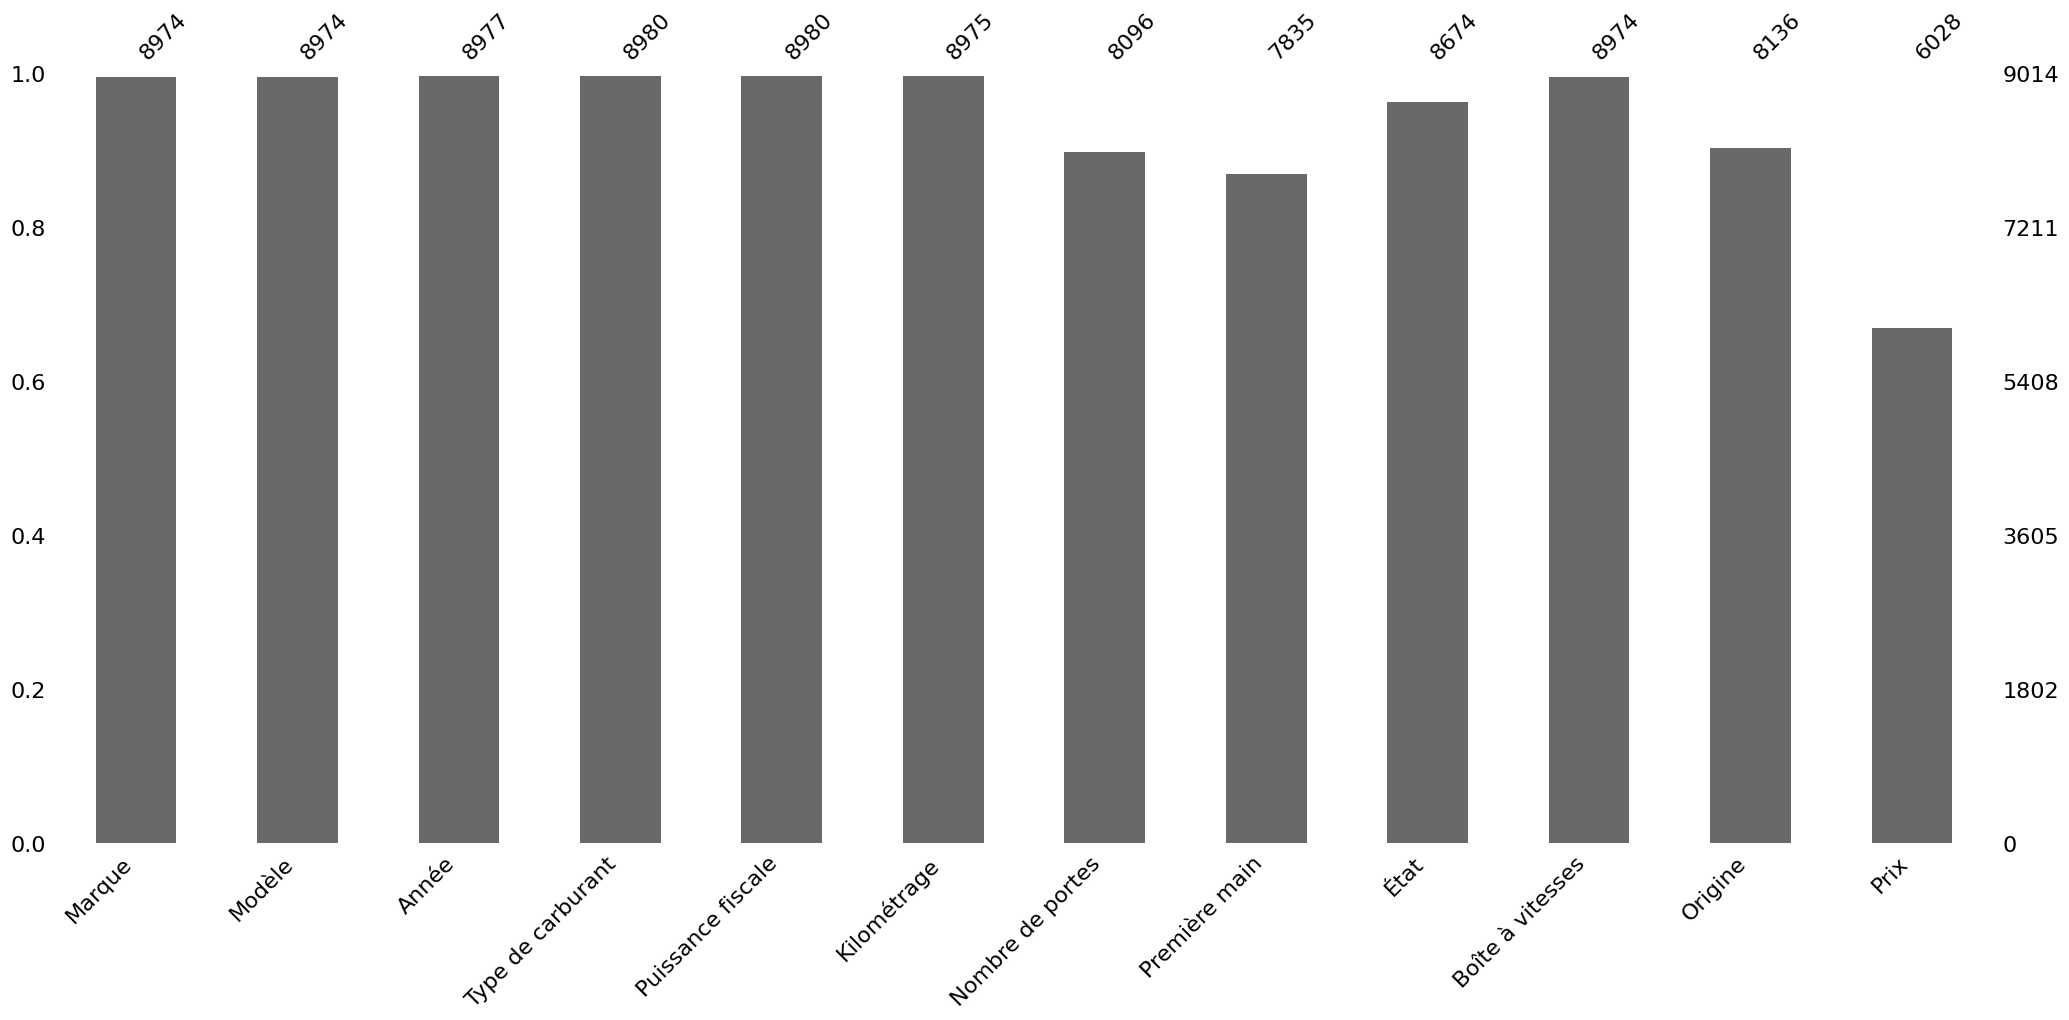

In [5]:
print(df.isnull().sum())

msno.bar(df)


#### <font color='green'>🧩 PARTIE 1 : GÉRER LES VALEURS MANQUANTES</font>

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.dropna(subset=['Prix','Première main','Nombre de portes'])
print(df.isnull().sum())
len(df)

Marque                 0
Modèle                 0
Année                  0
Type de carburant      0
Puissance fiscale      0
Kilométrage            0
Nombre de portes       0
Première main          0
État                  40
Boîte à vitesses       0
Origine              205
Prix                   0
dtype: int64


4870

In [8]:
df['Origine'] = df['Origine'].fillna(df['Origine'].mode()[0])

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['État'] = imputer.fit_transform(df[['État']]).flatten()


In [10]:
print(df.isnull().sum())


Marque               0
Modèle               0
Année                0
Type de carburant    0
Puissance fiscale    0
Kilométrage          0
Nombre de portes     0
Première main        0
État                 0
Boîte à vitesses     0
Origine              0
Prix                 0
dtype: int64


<Axes: >

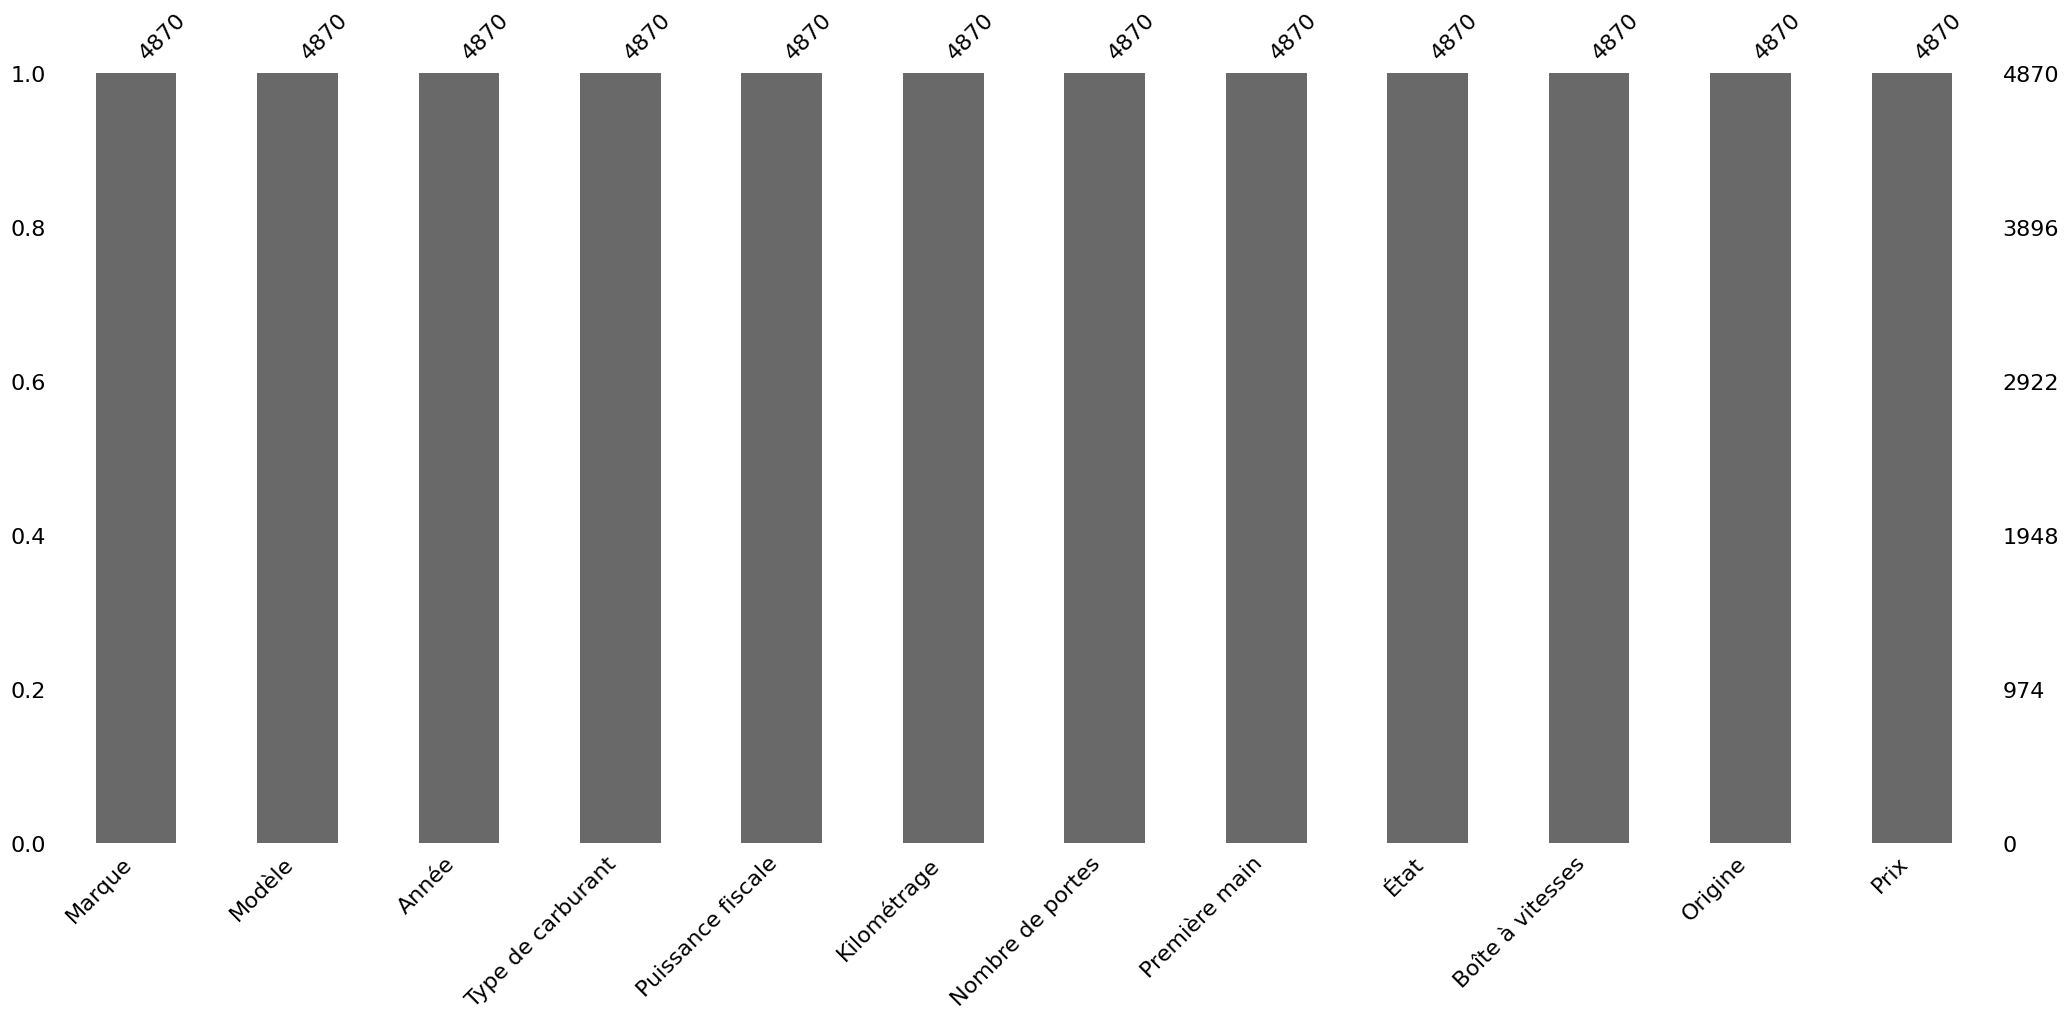

In [11]:
msno.bar(df)

In [12]:
df['Puissance fiscale'] = df['Puissance fiscale'].astype(str).str.extract('(\d+)', expand=False).astype(int)


In [13]:
df['Kilométrage'] = df['Kilométrage'].str.replace(" ", "").str.split("-")

df['Kilométrage'] = df['Kilométrage'].apply(
    lambda x: round((int(x[0]) + int(x[1])) / 2, -3) if isinstance(x, list) and len(x) == 2 else pd.NA
)

df['Kilométrage'] = df['Kilométrage'].astype("Int64")


In [14]:
df['Prix'] = df['Prix'].astype(str).str.replace(r'[^\d]','',regex=True)
df['Prix'] = pd.to_numeric(df['Prix'])

In [15]:
df['Année'] = df['Année'].astype(str).str.replace(' ou plus ancien','',regex=False).astype(int)


In [16]:
df['Nombre de portes'] = df['Nombre de portes'].astype(int)


In [17]:
df.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Kilométrage,Nombre de portes,Première main,État,Boîte à vitesses,Origine,Prix
0,Renault,Clio,2022,Essence,8,37000,5,Non,Très bon,Automatique,WW au Maroc,168000
2,Toyota,RAV 4,2014,Diesel,8,225000,5,Non,Excellent,Manuelle,WW au Maroc,146000
5,Peugeot,308,2018,Diesel,6,32000,5,Non,Excellent,Manuelle,WW au Maroc,169000
6,Seat,Toledo,2013,Diesel,6,225000,5,Non,Excellent,Manuelle,WW au Maroc,120000
7,Mini,CountryMan,2012,Essence,8,125000,5,Non,Neuf,Manuelle,WW au Maroc,103000


In [18]:
df.dtypes

Marque               object
Modèle               object
Année                 int64
Type de carburant    object
Puissance fiscale     int64
Kilométrage           Int64
Nombre de portes      int64
Première main        object
État                 object
Boîte à vitesses     object
Origine              object
Prix                  int64
dtype: object

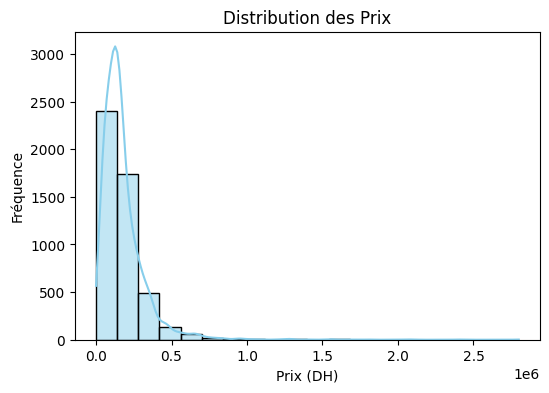

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Prix'], bins=20, kde=True, color='skyblue')
plt.title('Distribution des Prix')
plt.xlabel('Prix (DH)')
plt.ylabel('Fréquence')
plt.show()

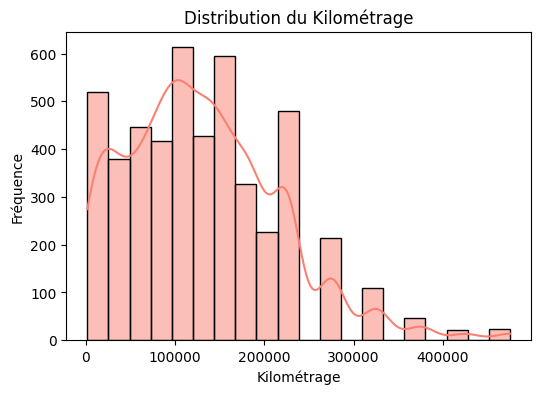

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Kilométrage'], bins=20, kde=True, color='salmon')
plt.title('Distribution du Kilométrage')
plt.xlabel('Kilométrage')
plt.ylabel('Fréquence')
plt.show()


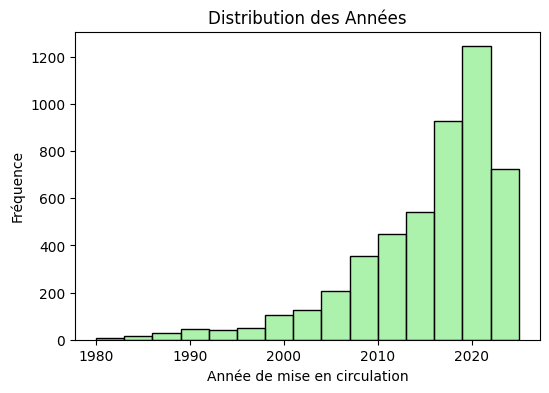

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Année'], bins=15, kde=False, color='lightgreen')
plt.title('Distribution des Années')
plt.xlabel('Année de mise en circulation')
plt.ylabel('Fréquence')
plt.show()


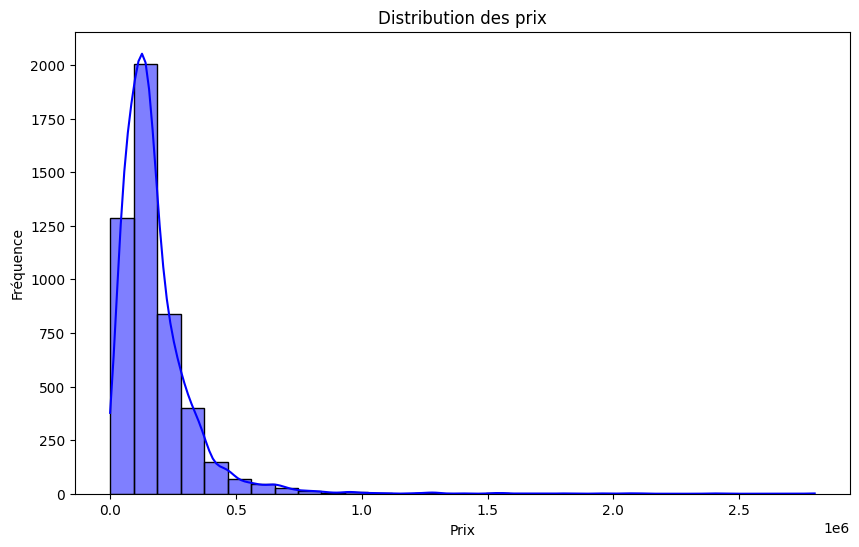

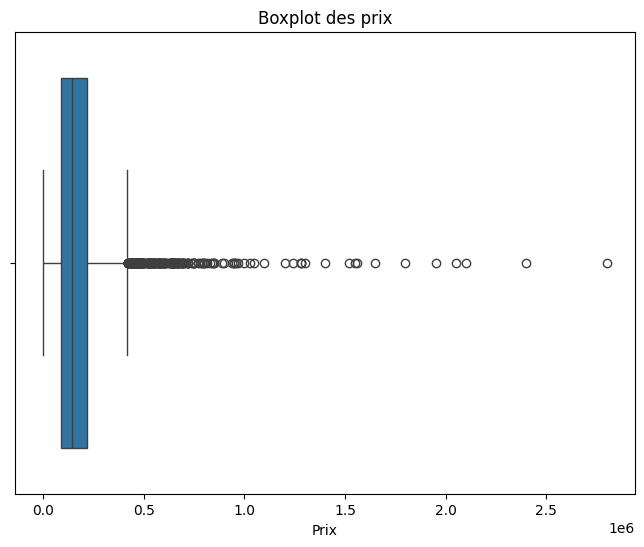

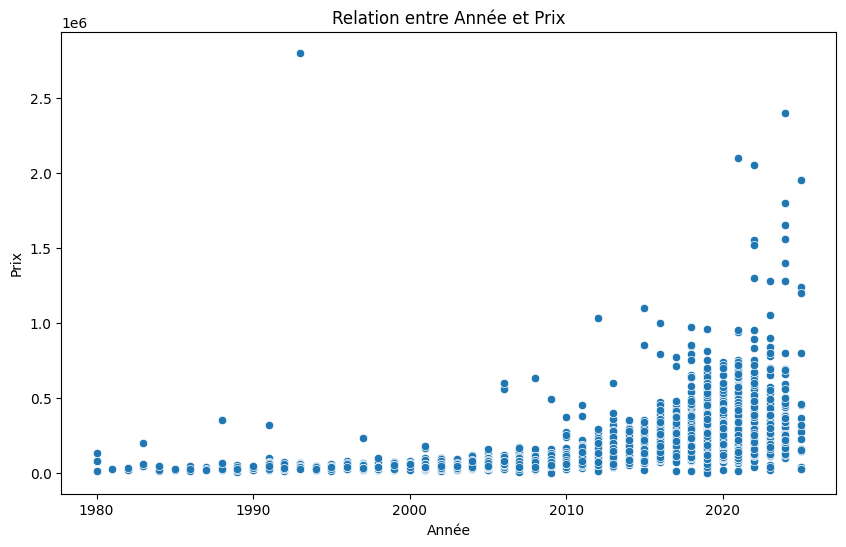

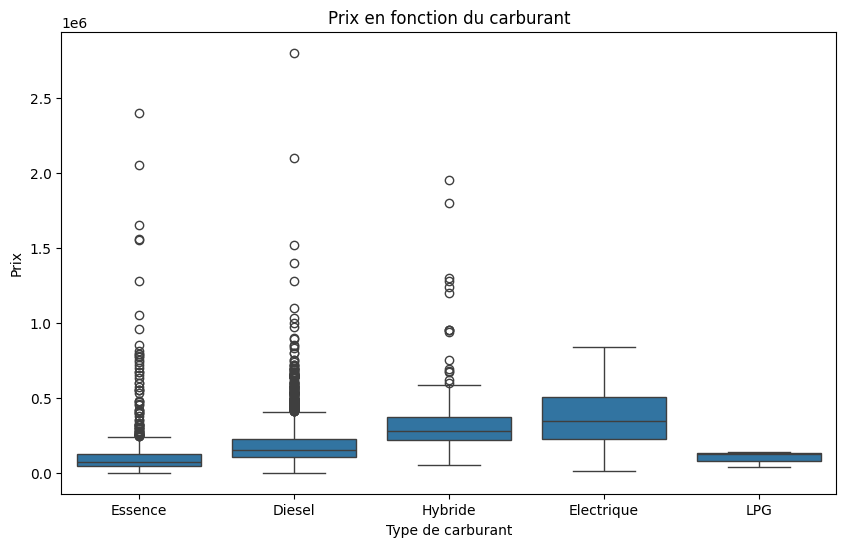

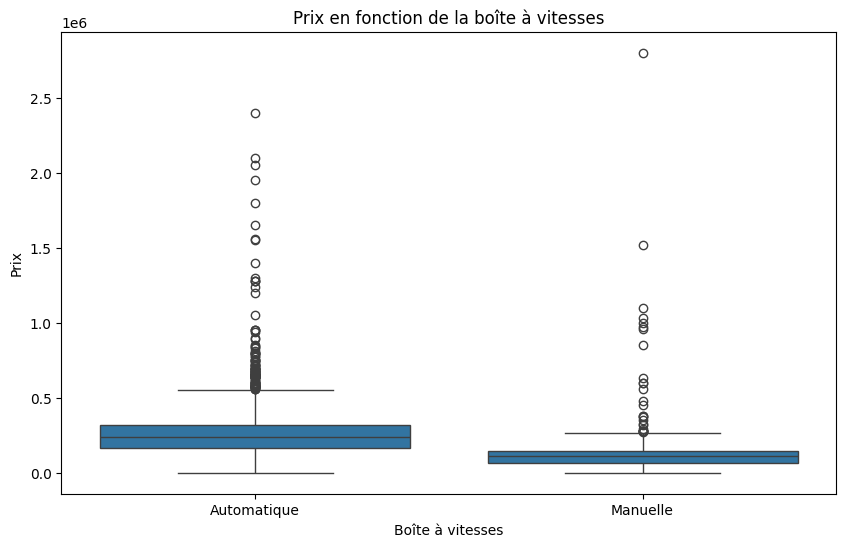

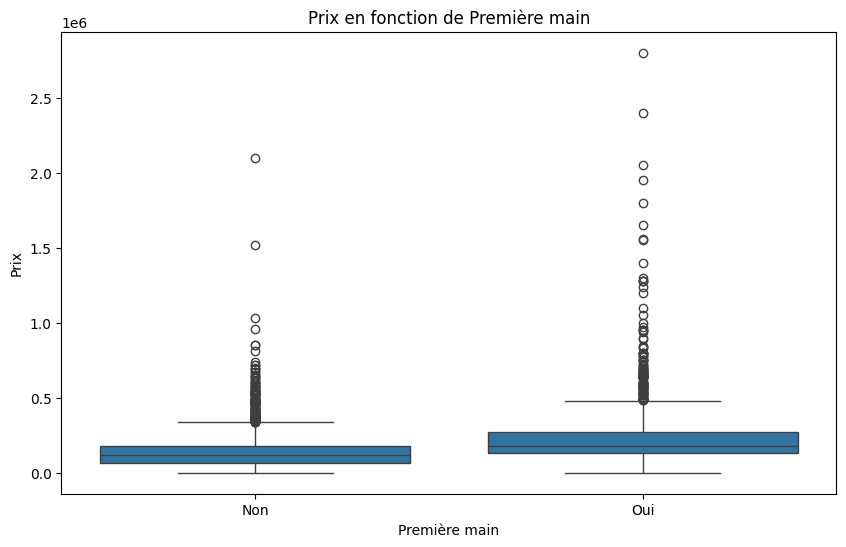

In [22]:
# 1. Distribution des prix (Prix)
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], kde=True, bins=30,color='blue')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

# Boxplot pour les prix
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Prix'])
plt.title('Boxplot des prix')
plt.xlabel('Prix')
plt.show()


# 3. Relation entre l'année et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Année'], y=df['Prix'])
plt.title('Relation entre Année et Prix')
plt.xlabel('Année')
plt.ylabel('Prix')
plt.show()

# 4. Boxplots par type de carburant, boîte à vitesses et Première main
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Type de carburant'], y=df['Prix'])
plt.title('Prix en fonction du carburant')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Boîte à vitesses'], y=df['Prix'])
plt.title('Prix en fonction de la boîte à vitesses')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Première main'], y=df['Prix'])
plt.title('Prix en fonction de Première main')
plt.show()



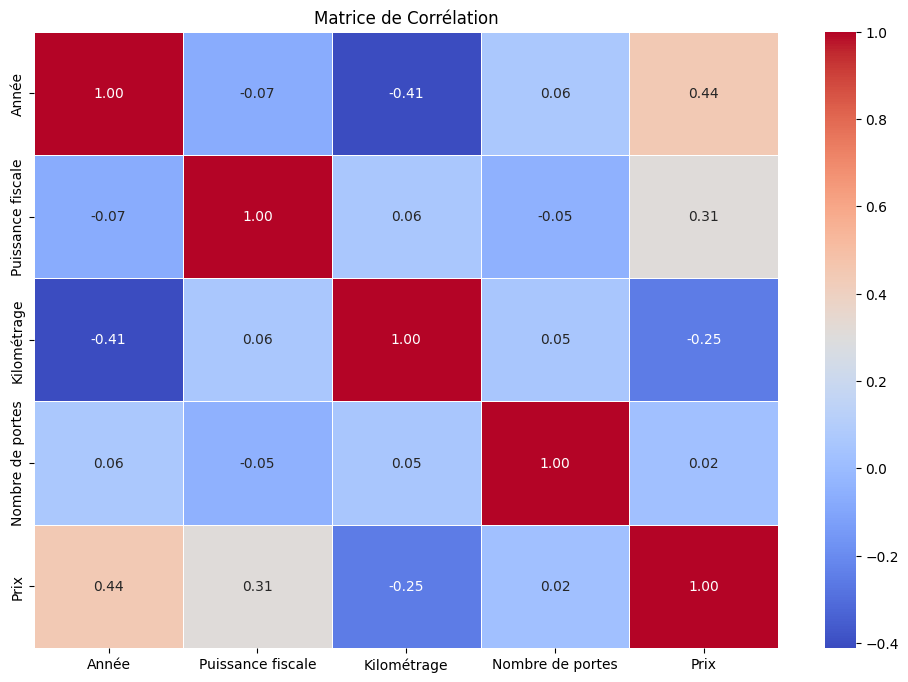

In [23]:
df_numeric = df.select_dtypes(include=['Int64', int])

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

#### <font color='green'>🧩 PARTIE 2 : GÉRER LES VALEURS ABERRANTES</font>

In [24]:
df.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Kilométrage,Nombre de portes,Première main,État,Boîte à vitesses,Origine,Prix
0,Renault,Clio,2022,Essence,8,37000,5,Non,Très bon,Automatique,WW au Maroc,168000
2,Toyota,RAV 4,2014,Diesel,8,225000,5,Non,Excellent,Manuelle,WW au Maroc,146000
5,Peugeot,308,2018,Diesel,6,32000,5,Non,Excellent,Manuelle,WW au Maroc,169000
6,Seat,Toledo,2013,Diesel,6,225000,5,Non,Excellent,Manuelle,WW au Maroc,120000
7,Mini,CountryMan,2012,Essence,8,125000,5,Non,Neuf,Manuelle,WW au Maroc,103000


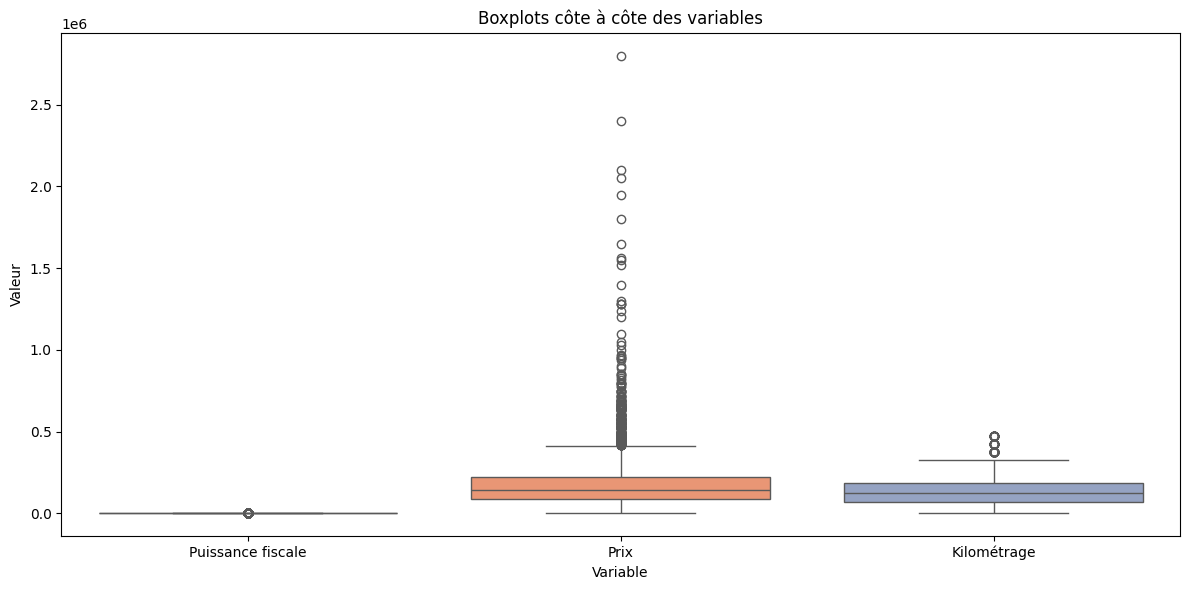

In [25]:
cols = ['Puissance fiscale','Prix','Kilométrage']
df_long = df[cols].melt(var_name='Variable', value_name='Valeur')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Valeur', data=df_long,hue='Variable', palette='Set2')  # Set2, Set3, Paired, etc.
plt.title('Boxplots côte à côte des variables')
plt.tight_layout()
plt.show()

In [26]:
def remove_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] <= upper) & (df[column] >= lower)]

In [27]:
df = remove_outliers('Prix')
df = remove_outliers('Kilométrage')

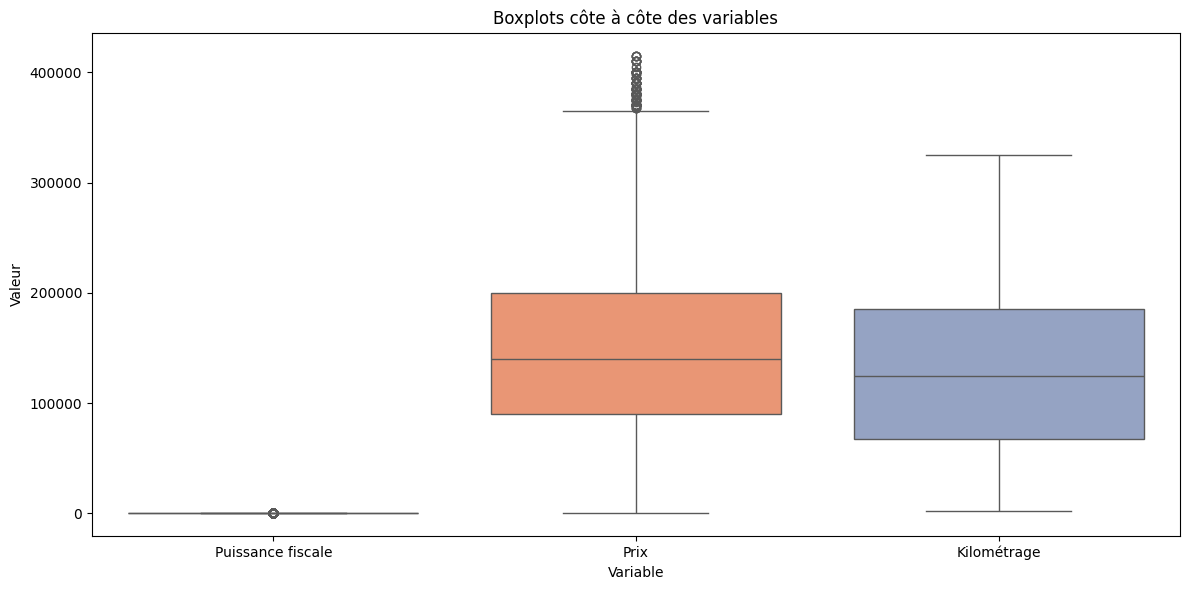

In [28]:
cols = ['Puissance fiscale','Prix','Kilométrage']
df_long = df[cols].melt(var_name='Variable', value_name='Valeur')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Valeur', data=df_long,hue='Variable', palette='Set2')  # Set2, Set3, Paired, etc.
plt.title('Boxplots côte à côte des variables')
plt.tight_layout()
plt.show()

In [30]:
len(df)


4496

#### <font color='green'>🧩 PARTIE 4 : Séparation des variables</font>

In [ ]:
X = df.drop(columns=['Prix'])
y = df['Prix']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### <font color='green'>🧩 PARTIE 5 :Encodage + Standardisation</font>

In [ ]:
num_cols=X_train.select_dtypes(include=['int','Int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([
    ('scaler',StandardScaler())
])
categorical_pipeline = Pipeline([
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num',numeric_pipeline,num_cols),
    ('cat',categorical_pipeline,cat_cols)
])

## <font color='red'>2. ⚙️ Modèle  </font>

✅ Évaluation sur le set de test :
Régression Linéaire
MAE : 25722.33 DH
RMSE : 36857.49 DH
MSE : 1358474367.02 DH
R² : 0.82


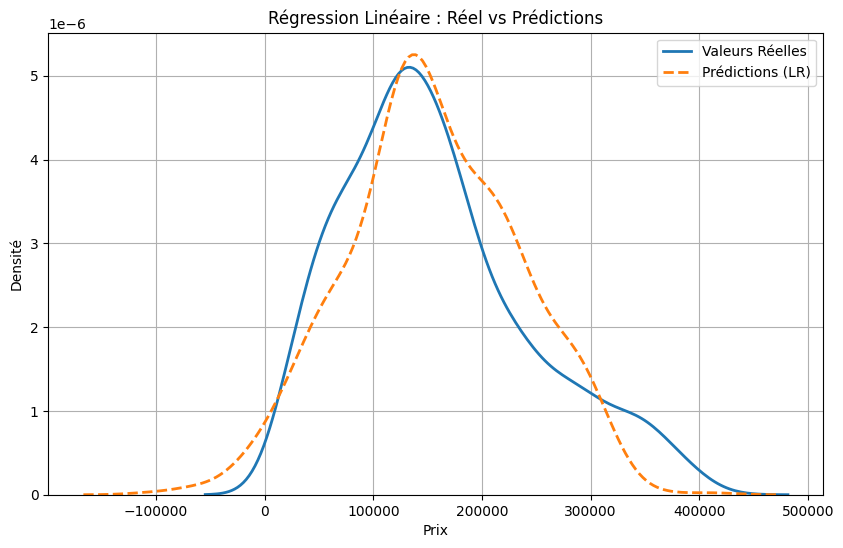

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

model_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("✅ Évaluation sur le set de test :")

print("Régression Linéaire")
print("MAE : {:.2f} DH".format(mean_absolute_error(y_test, y_pred_lr)))
print("RMSE : {:.2f} DH".format(np.sqrt(mean_squared_error(y_test, y_pred_lr))))
print("MSE : {:.2f} DH".format(mean_squared_error(y_test, y_pred_lr)))
print("R² : {:.2f}".format(r2_score(y_test, y_pred_lr)))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valeurs Réelles', linewidth=2)
sns.kdeplot(y_pred_lr, label='Prédictions (LR)', linewidth=2, linestyle='--')
plt.title('Régression Linéaire : Réel vs Prédictions')
plt.xlabel('Prix')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

Random Forest
MAE : 20619.31 DH
RMSE : 31019.34 DH
MSE : 962199337.94 DH
R² : 0.87


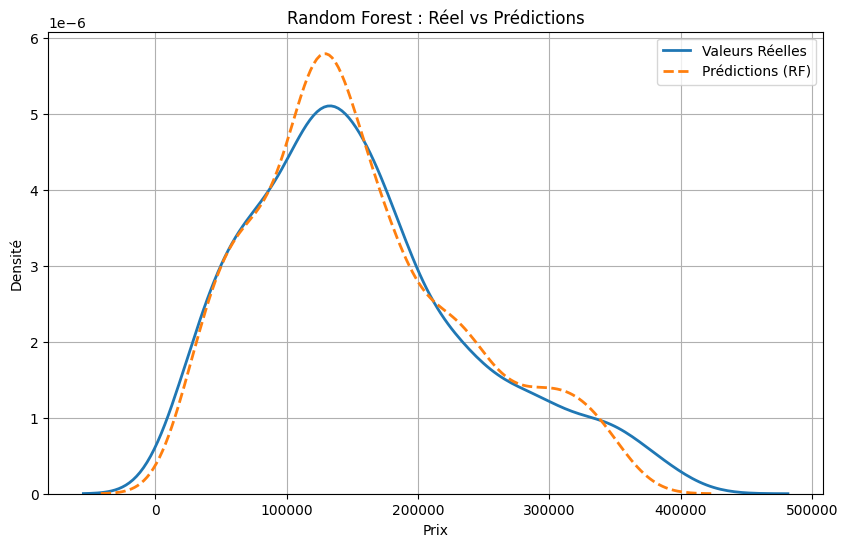

In [33]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest")
print("MAE : {:.2f} DH".format(mean_absolute_error(y_test, y_pred_rf)))
print("RMSE : {:.2f} DH".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print("MSE : {:.2f} DH".format(mean_squared_error(y_test, y_pred_rf)))
print("R² : {:.2f}".format(r2_score(y_test, y_pred_rf)))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valeurs Réelles', linewidth=2)
sns.kdeplot(y_pred_rf, label='Prédictions (RF)', linewidth=2, linestyle='--')
plt.title('Random Forest : Réel vs Prédictions')
plt.xlabel('Prix')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from xgboost import XGBRegressor
model = Pipeline([
    ('preprocessing',preprocessor),
    ('model',XGBRegressor(random_state=42)
)
])


: 

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {
    'model__n_estimators': [300, 500, 800],
    'model__max_depth': [5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    
}


# Initialize GridSearchCV
search = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_absolute_error',verbose=2)

search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.3s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.3s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.3s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.3s
[CV] END model__learning_rate=0.01, mo

In [ ]:
best_model = search.best_estimator_

# ✅ Save the trained model
import joblib
joblib.dump(best_model, 'car_price_model.pkl')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("✅ Évaluation sur le set de test :")
print(f"MAE : {mae:.2f} DH")
print(f"RMSE : {rmse:.2f} DH")
print(f"MSE : {mse:.2f} DH")
print(f"R² : {r2:.2f}")
print("🔧 Meilleurs hyperparamètres :", search.best_params_)




✅ Évaluation sur le set de test :
MAE : 18027.47 DH
RMSE : 27938.96 DH
MSE : 780585472.00 DH
R² : 0.90
🔧 Meilleurs hyperparamètres : {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 800}


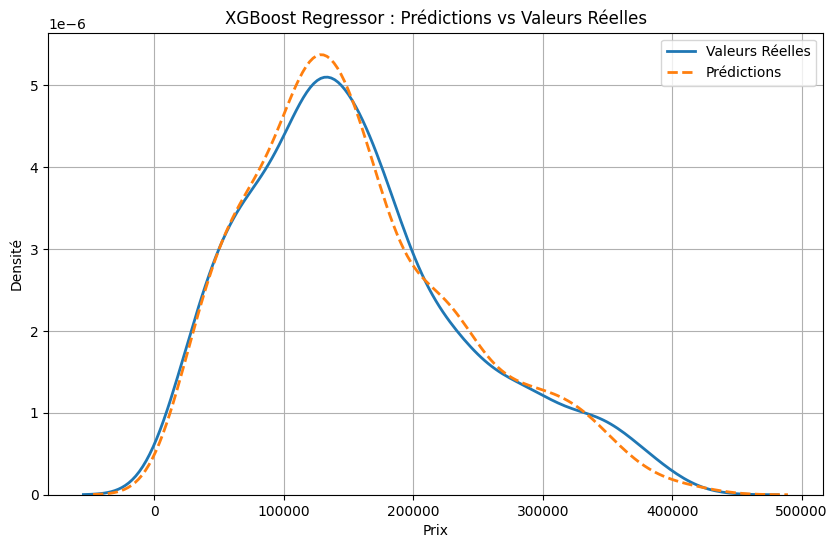

In [ ]:
y_pred = search.predict(X_test)

# Affichage de la distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valeurs Réelles', linewidth=2)
sns.kdeplot(y_pred, label='Prédictions', linewidth=2, linestyle='--')
plt.title('XGBoost Regressor : Prédictions vs Valeurs Réelles')
plt.xlabel('Prix')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import joblib

# Load the trained model (pipeline with preprocessing + model)
best_model = joblib.load('car_price_model.pkl')

y_train_pred = best_model.predict(X_train)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)

print(f"🔍 R² sur le train : {r2_train:.2f}")
print(f"📊 R² sur le test : {r2:.2f}")


🔍 R² sur le train : 0.98
📊 R² sur le test : 0.90
